In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline 

import glam

%load_ext autoreload
%autoreload 2

/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


Set up sensible parameter bounds first. These are based on the parameter estimates obtained fitting the model to the Krajbich & Rangel (2011) ternary choice data set.

In [2]:
parameter_bounds = dict(v=(0.00003, 0.00015),
                        s=(0.005, 0.011),
                        gamma=(-1, 1),
                        tau=(0.2, 2))

# Testing the `GLAM.predict` method

## Simulation

We simulate two groups with different gaze biases (`gamma` parameters). Note, this is a between-subject design. The two groups are of different sizes. Here, we simulate from individual parameters, but this should not matter.

In [3]:
np.random.seed(1)

m = glam.GLAM()

n_items = 3
n_trials = 100

groups = ['A', 'B']
n_groups = len(groups)
N = dict(A=2, B=2)

gamma_mu = dict(A=0.5, B=-0.5)
gamma_sd = dict(A=0.2, B=0.2)

for group in groups:

    parameters = dict(v=np.clip(np.random.normal(loc=0.00007,
                                                 scale=0.00001,
                                                 size=N[group]),
                                *parameter_bounds['v']),
                      gamma=np.clip(np.random.normal(loc=gamma_mu[group],
                                                     scale=gamma_sd[group],
                                                     size=N[group]), 
                                    *parameter_bounds['gamma']),
                      s=np.clip(np.random.normal(loc=0.008,
                                                 scale=0.001,
                                                 size=N[group]),
                                *parameter_bounds['s']),
                      tau=np.clip(np.random.normal(loc=0.8,
                                                   scale=0.1,
                                                   size=N[group]),
                                  *parameter_bounds['tau']),
                      t0=np.zeros(N[group]))
    
    m.simulate_group(kind='individual',
                     parameters=parameters,
                     n_individuals=N[group],
                     n_trials=n_trials,
                     n_items=n_items,
                     label=group)

m.data.rename({'condition':'group'}, axis=1, inplace=True)

In [4]:
def plot_model_parameters(model, parameters=['v', 'gamma', 's', 'tau'],
                          parameter_bounds=dict(v=(0.00003, 0.00015),
                                                s=(0.005, 0.011),
                                                gamma=(-1, 1),
                                                tau=(0.2, 2)),
                          n_bins=10):

    fig, axs = plt.subplots(1, len(parameters),
                            figsize=(len(parameters)*3, 3),
                            sharey='row')

    for g, group in enumerate(model.parameters.keys()):
        for p, parameter in enumerate(parameters):
            axs[p].hist(model.parameters[group][parameter],
                        bins=np.linspace(*parameter_bounds[parameter], n_bins),
                        color='C{}'.format(g),
                        alpha=0.75,
                        label=group)
            axs[p].set_title(parameter)
    axs[-1].legend()
    fig.tight_layout()
    
    return fig, axs

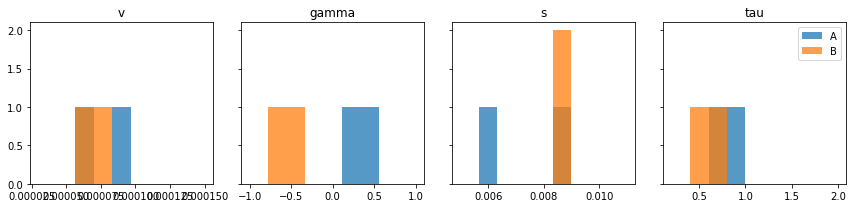

In [5]:
plot_model_parameters(m);

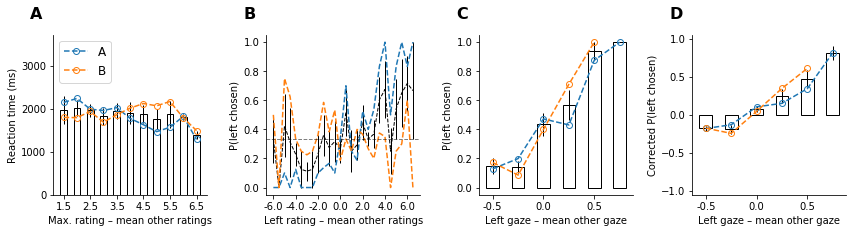

In [6]:
glam.plot_fit(m.data,
              [m.data[m.data['group'] == group]
               for group in groups],
              prediction_labels=groups);

## Model fitting

In [7]:
m.make_model('individual',
             depends_on=dict(gamma='group'),
             t0_val=0)
m.fit(method='NUTS')

Generating single subject models for 4 subjects...


KeyError: 'SNR_condition_index'

# Prediction

In [8]:
m.predict(n_repeats=10)

1900it [01:55, 16.45it/s]


In [9]:
m.prediction.head(20)

,choice,gaze_0,gaze_1,gaze_2,group,item_value_0,item_value_1,item_value_2,repeat,rt,subject,trial
0,0.0,0.450184,0.411059,0.138757,A,8.0,7.0,7.0,0.0,1996.0,0.0,0.0
1,0.0,0.450184,0.411059,0.138757,A,8.0,7.0,7.0,1.0,1419.0,0.0,0.0
2,0.0,0.450184,0.411059,0.138757,A,8.0,7.0,7.0,2.0,1086.0,0.0,0.0
3,2.0,0.450184,0.411059,0.138757,A,8.0,7.0,7.0,3.0,2849.0,0.0,0.0
4,0.0,0.450184,0.411059,0.138757,A,8.0,7.0,7.0,4.0,1294.0,0.0,0.0
5,0.0,0.450184,0.411059,0.138757,A,8.0,7.0,7.0,5.0,1485.0,0.0,0.0
6,0.0,0.450184,0.411059,0.138757,A,8.0,7.0,7.0,6.0,1646.0,0.0,0.0
7,0.0,0.450184,0.411059,0.138757,A,8.0,7.0,7.0,7.0,1729.0,0.0,0.0
8,0.0,0.450184,0.411059,0.138757,A,8.0,7.0,7.0,8.0,2451.0,0.0,0.0
9,0.0,0.450184,0.411059,0.138757,A,8.0,7.0,7.0,9.0,1096.0,0.0,0.0


(<matplotlib.figure.Figure at 0x1c24a2a9e8>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x1c24a017b8>,
       dtype=object))

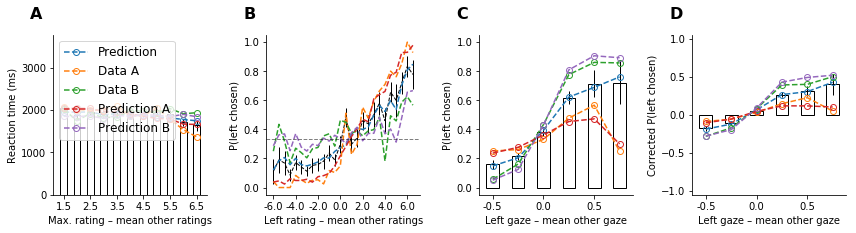

In [15]:
glam.plot_fit(m.data, [m.prediction,
                       m.data[m.data['group'] == 'A'],
                       m.data[m.data['group'] == 'B'],
                       m.prediction[m.prediction['group'] == 'A'],
                       m.prediction[m.prediction['group'] == 'B']],
             prediction_labels=['Prediction', 'Data A', 'Data B', 'Prediction A', 'Prediction B'])